____________

### DATASET INFORMATION: 





COLUMN DESCRIPTIONS: 
* ID: Customer ID 
* Age: Customer's age in completed 
* years Experience: years of professional experience 
* Income: Annual income of the customer ($000) 

* ZIPCode: Home Address ZIP code. 

* Family: Family size of the customer 

* CCAvg: Avg. spending on credit cards per month ($000) 

* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 

* Mortgage: Value of house mortgage if any. ($000) 

* Personal Loan(TARGET VARIABLE): Did this customer accept the personal loan offered in the last campaign? 
 
 

In [1]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file)
    df=pd.read_csv("data_set.csv")

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0
4,5,35,8,45,91330,4,1.0,2,0,0


### 1.	Data Understanding 

In [3]:
# Reading the dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0
4,5,35,8,45,91330,4,1.0,2,0,0


In [4]:
# shape of the dataset
df.shape

(5000, 10)

In [5]:
# Info of the dataset
df.info() #All the features are continuous 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
ID               5000 non-null int64
Age              5000 non-null int64
Experience       5000 non-null int64
Income           5000 non-null int64
ZIP Code         5000 non-null int64
Family           5000 non-null int64
CCAvg            5000 non-null float64
Education        5000 non-null int64
Mortgage         5000 non-null int64
Personal Loan    5000 non-null int64
dtypes: float64(1), int64(9)
memory usage: 390.7 KB


In [6]:
# Five point summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000


In [7]:
# Typecasting neccesary variables into categ
df[['ZIP Code','Education']]=df[['ZIP Code','Education']].astype(str)

In [8]:
#These are the categorical variables
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,2,figsize=(15,5))
df['Education'].value_counts().plot(kind='pie',autopct="%0.1f%%",ax=axes[0])
df['Personal Loan'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=axes[1])
plt.show()

<Figure size 1500x500 with 2 Axes>

In [9]:
#
#Check for null values
df.isna().sum() #There is no null values present

ID               0
Age              0
Experience       0
Income           0
ZIP Code         0
Family           0
CCAvg            0
Education        0
Mortgage         0
Personal Loan    0
dtype: int64

In [10]:
#Due to presence of unique values we are dropping the column ID
df=df.drop('ID',axis=1)

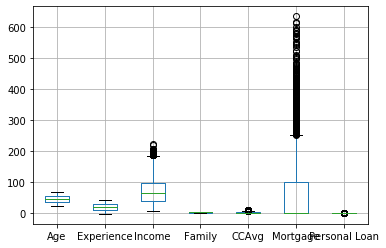

In [11]:
# Check for outliers
df.boxplot()
plt.show()

In [12]:
#There is presence of outliers in mortgage, income and CCAvg in the upper side.

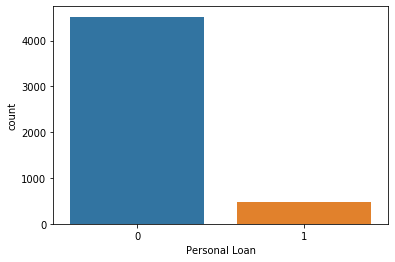

In [13]:
#Our class variable is personal loan
import seaborn as sns
sns.countplot(df['Personal Loan'])
plt.show()

In [14]:
#9.6% customers accepted the loan and the remaining customers did not accept the loan.So, our dataset is highly imbalanced.

### 2.	Data Preparation


In [15]:
# TREATING IMBALANCE IN THE CLASS VARIABLE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [16]:
rej=df['Personal Loan'].value_counts()[0]
acc=df['Personal Loan'].value_counts()[1]

In [17]:
x=df.drop('Personal Loan',axis=1)
y=df['Personal Loan']
pipe=make_pipeline(SMOTE(sampling_strategy={1:acc}),NearMiss(sampling_strategy={0:rej}))
in_bal,out_bal=pipe.fit_resample(x,y)

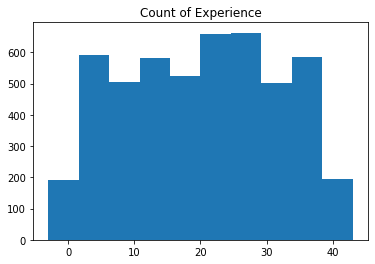

In [18]:
#Univaraite analysis of all numerical features
plt.hist(df['Experience'])
plt.title('Count of Experience')
plt.show()

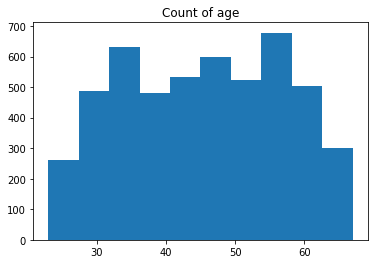

In [19]:
plt.hist(df['Age'])
plt.title('Count of age')
plt.show()

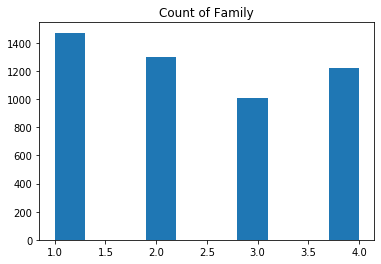

In [20]:
plt.hist(df['Family'])
plt.title('Count of Family')
plt.show()

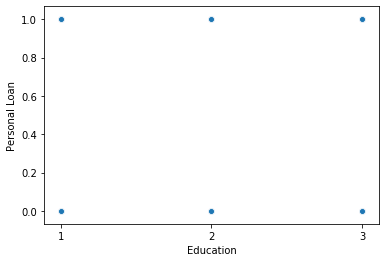

In [21]:
#Bivariate analysis
#Categorical features vs class feature
sns.scatterplot(df['Education'],df['Personal Loan'])

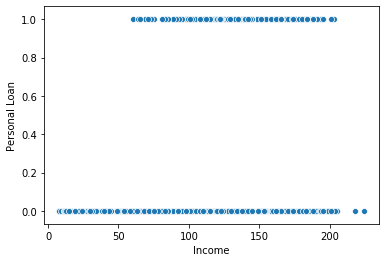

In [22]:
sns.scatterplot(df['Income'],df['Personal Loan'])

In [23]:
#Multivariate analysis
#sns.pairplot(df,hue='Personal Loan')
#plt.show()

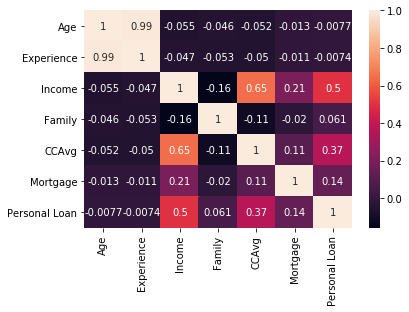

In [24]:
#Correlation with the target variable
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
#Only the feature income seems to show high correlation with the class variable.
#Only id feature seemed to be redundant so we dropped it earlier.
#Type casting of zip code and education to categorical is done.

In [26]:
#
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3)

In [27]:
#Outlier treatment using power transformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
power_train=pt.fit_transform(x_train)
power_test=pt.transform(x_test)

In [28]:
#scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_train=sc.fit_transform(power_train)
sc_test=sc.transform(power_test)

In [29]:
#statistically ascertaining that both train and test are good representation of the data
print(x_train['Income'].mean(),x_test['Income'].mean())

73.07314285714286 75.41


In [30]:
#Both the means of train and test are almost same. So, we can say that both the train and test represent the 
#overall data.

### 3.	Model Building 


In [31]:
# Base model - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,auc
from sklearn import metrics
lr=LogisticRegression()
lr.fit(sc_train,y_train)
y_pred=lr.predict(sc_test)

In [32]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.9573333333333334
[[1344   16]
 [  48   92]]


In [56]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1360
           1       0.58      0.64      0.61       140

    accuracy                           0.92      1500
   macro avg       0.77      0.80      0.79      1500
weighted avg       0.93      0.92      0.93      1500



In [33]:
#Using logistic regression we obtained an accuracy of 95.7%
#Out of 1500 records , 64 records are missclassified. Out of which 16 records are false positive and 48 are false negative
#So, 48 records are actually present and predicted not to be present and 16 records are actually not present and
#predicted to be present.

In [34]:
#hyper parameter tuning - grid search cv for logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'C':[0.1,0.5,1,5]}
lr=LogisticRegression()
grid=GridSearchCV(lr,parameters)
grid.fit(sc_train,y_train)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

0.9573333333333334
[[1344   16]
 [  48   92]]


In [35]:
score=roc_auc_score(y_test,y_pred)
print(score)

0.8226890756302522


In [36]:
y_pred_prob=grid.predict_proba(sc_test)[:,1]
print(y_pred_prob[0])
fpr, tpr,_= metrics.roc_curve(y_test,y_pred_prob)
roc_auc=roc_auc_score(y_test,y_pred_prob)
print(roc_auc)

2.915327753870074e-05
0.9506249999999999


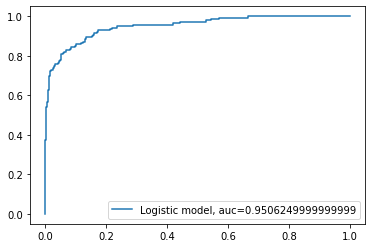

In [37]:
plt.plot(fpr,tpr,label='Logistic model, auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [38]:
print(round(score,2))
print(round(y_pred_prob[0],2))
print(round(roc_auc,2))

0.82
0.0
0.95


In [39]:
#Decision tree classfier
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(sc_train,y_train)
y_pred=dct.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.9846666666666667
[[1349   11]
 [  12  128]]


In [40]:
score=roc_auc_score(y_test,y_pred)
print(score)

0.9530987394957983


In [57]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1360
           1       0.58      0.64      0.61       140

    accuracy                           0.92      1500
   macro avg       0.77      0.80      0.79      1500
weighted avg       0.93      0.92      0.93      1500



In [41]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
rfc=RandomForestClassifier()
rfc.fit(sc_train,y_train)
y_pred=rfc.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.9866666666666667
[[1356    4]
 [  16  124]]


In [42]:
score=roc_auc_score(y_test,y_pred)
print(score)

0.9413865546218487


In [58]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1360
           1       0.58      0.64      0.61       140

    accuracy                           0.92      1500
   macro avg       0.77      0.80      0.79      1500
weighted avg       0.93      0.92      0.93      1500



In [43]:
#AdaBoostClassifier
abd=AdaBoostClassifier()
abd.fit(sc_train,y_train)
y_pred=abd.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.9673333333333334
[[1347   13]
 [  36  104]]


In [44]:
score=roc_auc_score(y_test,y_pred)
print(score)

0.8666491596638657


In [45]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(sc_train,y_train)
y_pred=knn.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.9613333333333334
[[1360    0]
 [  58   82]]


In [46]:
score=roc_auc_score(y_test,y_pred)
print(score)

0.7928571428571429


In [47]:
#Naive Bayesian
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(sc_train,y_train)
y_pred=gnb.predict(sc_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

Accuracy 0.924
[[1296   64]
 [  50   90]]


In [48]:
score=roc_auc_score(y_test,y_pred)
print(score)

0.7978991596638654


In [49]:
#Finding the best model on the basis of their accuracy
from sklearn.model_selection import cross_val_score

In [50]:
#Logistic Regression
lrcrossval=cross_val_score(lr,x,y,cv=3)
lrcrossval.mean()

0.9071983922543222

In [51]:
#Decision tree 
dctcrossval=cross_val_score(dct,x,y,cv=3)
dctcrossval.mean()

0.9804001984717102

In [52]:
#Randomforest classifier
rfccrossval=cross_val_score(rfc,x,y,cv=3)
rfccrossval.mean()

0.9852003188798015

In [53]:
#Ada Boost classifier
adbcrossval=cross_val_score(abd,x,y,cv=3)
adbcrossval.mean()

0.9633999970714141

In [54]:
#Knn
knncrossval=cross_val_score(knn,x,y,cv=3)
knncrossval.mean()

0.9020005122624934

In [55]:
#Naive bayes
gnbcrossval=cross_val_score(gnb,x,y,cv=3)
gnbcrossval.mean()

0.9030005523505142

In [ ]:
#From the above scores we can see that the randomforestclassifier model has given the highest accuracy of 98.5%
#Hence, this is our best model.